<a href="https://colab.research.google.com/github/alihajnayeb/SP/blob/main/in_specgram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import libraries

import pandas as pd
import numpy as np
from google.colab import drive
drive.mount("/content/drive")
fs = 20000 # sampling frequency

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
## The file path:
#path = "/content/drive/Shareddrives/Inmotive Engineering/Validation/Test Reports/T00053 (Suzuki NVH 1a 1b 1c)/D4/Suzuki-D4-20122023-background-noise.csv"
## Read the CSV file into a DataFrame
#df = pd.read_csv(path)
## Display the DataFrame
#df.head(5)

In [4]:
import zipfile

zip_ref = zipfile.ZipFile("/content/drive/Shareddrives/Inmotive Engineering/Validation/Test Reports/T00053 (Suzuki NVH 1a 1b 1c)/D4/Dewesoft Files/Suzuki-D4-21122023-test2_excel.zip", 'r')
zip_ref.extractall("/tmp")
zip_ref.close()


In [5]:
df2 = pd.read_csv("/tmp/Suzuki-D4-21122023-test2_excel.csv")
df2.head(5)

,Time (s),AI B-16/Mic IGM (Pa),AI C-9/Z-Ing Shaft Bear (Motor) (m/s2)
0,9.65915,-0.747861,-2.312801
1,9.65920,-1.154601,2.402658
2,9.65925,-0.806090,2.487228
3,9.65930,-0.532151,-1.515524
4,9.65935,-1.067813,5.460136


In [6]:
vnoise = df2['AI B-16/Mic IGM (Pa)'].var()
print(vnoise)

0.41882164873481487


In [7]:
from scipy import signal

In [8]:
from scipy import signal
cutfreq = 3000 # low-pass filtering cutting frequency
cutr = cutfreq/fs # ratio
bf, af = signal.butter(4, 3000, 'low', analog=True) #scipy.signal.butter(8, cutr, 'lowpass') # defining a low-pass filter with cutoff frequency of 700Hz
bpaxn = signal.lfilter(bf, af, df2['AI B-16/Mic IGM (Pa)']) # low-pass filtering a signal from the data frame
vht = np.var(bpaxn)
print(vht)

nan


In [23]:
import matplotlib.pyplot as plt
fs=20000
x=df2['AI B-16/Mic IGM (Pa)'];#np.cos(2*np.pi*t*(f0*t))
nfft=1024

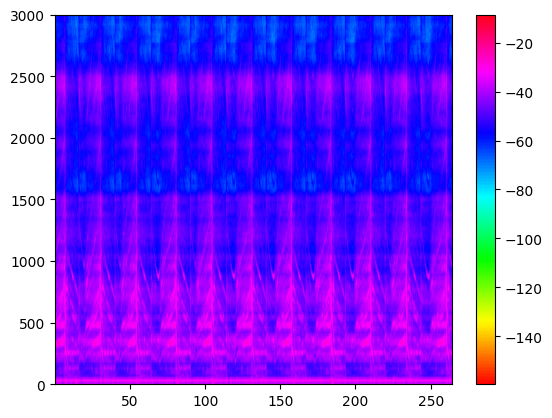

In [28]:
[a,b,c,d]=plt.specgram(x, NFFT=nfft, Fs=fs, window=np.hanning(nfft), scale='dB', noverlap=850, cmap='hsv') # mode='psd',
plt.ylim([0, 3000])
plt.colorbar()
plt.show()